# **Preprocessing - Feature Engineering and Feature Selection**

In [71]:
#import libraries
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [72]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [73]:
pip install feature_engine

In [74]:
train_df=pd.read_csv("Training_Dataset_v2.csv")       #reading dataset

In [75]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [76]:
train_df.shape

(1687861, 23)

In [77]:
train_df.info()        #information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [78]:
train_df.describe(include="all")

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1687860,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,3278298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686953,NaN,NaN,NaN,NaN,1300377,1687615,1484026,1626774,1687129,1676567
mean,NaN,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,NaN,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,NaN,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,NaN,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,NaN,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


A generic question shall be: Which order could not be fulfilled by the company?

These general questions might lead you to more specific questions:

-What’s the relationship between products and backorder? 

-How prominent is that relationship? 

-Which features contribute more to backorder (company is not able to keep up with the delivery of the order)? 

-Which product has high demand ?

So answer all these question, we will first visualize our data.

### **Missing Values**
First step is to check hor many missing values are present in our data.

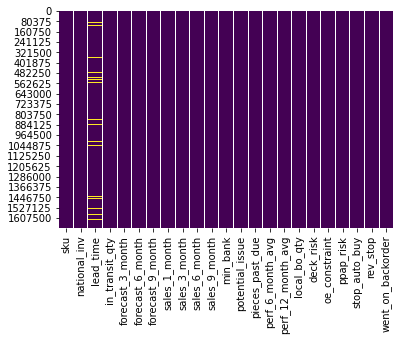

In [79]:
sns.heatmap(train_df.isnull(), cmap='viridis',cbar=False)

In [80]:
train_df.isna().sum()       #checking number of missing values

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [81]:
data=train_df.copy(deep=True)

In [82]:
id=data['sku']
data.drop('sku',axis=1,inplace=True)                #drop id column

In [83]:
#Now , lets see how many columns are numerical and categorical for better understanding
## Numerical Features
Numerical_features=data.select_dtypes(exclude=['object'])
print( "Numerical features: ",Numerical_features.columns)

## Categorical columns
Categorical_features=data.select_dtypes(include=['object'])
print( "Categorical_features: ",Categorical_features.columns)

Numerical features:  Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')
Categorical_features:  Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')


### **Categorical Values**

In [84]:
#checking how many unique values are in columns
for col in Categorical_features.columns:
    print(len(data[col].unique()))

3
3
3
3
3
3
3


In [85]:
str=Categorical_features.columns

In [86]:
data[col].unique()

array(['No', 'Yes', nan], dtype=object)

In [87]:
from feature_engine import variable_transformers as vt
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisers import EqualWidthDiscretiser

### **------------------------------------------Impute Missing Values-----------------------------------------------------**

In [88]:
data['lead_time'].fillna(data['lead_time'].median(),inplace=True)          #replace missing vales in "lead_time" with its median

In [89]:
data.dropna(how='any',thresh=None, subset=None, inplace=True)        #drop rest nan values

In [90]:
(data.isna().mean())*100        #check % of missing values

national_inv         0.0
lead_time            0.0
in_transit_qty       0.0
forecast_3_month     0.0
forecast_6_month     0.0
forecast_9_month     0.0
sales_1_month        0.0
sales_3_month        0.0
sales_6_month        0.0
sales_9_month        0.0
min_bank             0.0
potential_issue      0.0
pieces_past_due      0.0
perf_6_month_avg     0.0
perf_12_month_avg    0.0
local_bo_qty         0.0
deck_risk            0.0
oe_constraint        0.0
ppap_risk            0.0
stop_auto_buy        0.0
rev_stop             0.0
went_on_backorder    0.0
dtype: float64

### **------------------------------------------Categorical Encoding-----------------------------------------------------**

In [91]:
data[col].unique()              #unique values in categorical columns

array(['No', 'Yes'], dtype=object)

In [92]:
#encoding of categorical
for col in str:
    data[col] = data[col].map({"Yes" : 0, "No" : 1})

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1687860 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   forecast_6_month   1687860 non-null  float64
 5   forecast_9_month   1687860 non-null  float64
 6   sales_1_month      1687860 non-null  float64
 7   sales_3_month      1687860 non-null  float64
 8   sales_6_month      1687860 non-null  float64
 9   sales_9_month      1687860 non-null  float64
 10  min_bank           1687860 non-null  float64
 11  potential_issue    1687860 non-null  int64  
 12  pieces_past_due    1687860 non-null  float64
 13  perf_6_month_avg   1687860 non-null  float64
 14  perf_12_month_avg  1687860 non-null  float64
 15  local_bo_qty       1687860 non-n

**Now there is no missing value left and all columns are integer and float.**

In [94]:
y=data['went_on_backorder']
print(y.shape)

(1687860,)


In [95]:
data.drop('went_on_backorder', axis=1,inplace=True)
X=data
X.shape

(1687860, 21)

### **splitting data set into train and test dataset**

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [97]:
print("Train Set Size : ",x_train.shape)
print("Train Target Set Size : ",y_train.shape)
print("Test  Set Size : ",x_test.shape)
print("Test  Target Set Size : ",y_test.shape)

Train Set Size :  (1181502, 21)
Train Target Set Size :  (1181502,)
Test  Set Size :  (506358, 21)
Test  Target Set Size :  (506358,)


### **Model Building**

In [98]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Logistic Regression

In [99]:
def run_logistic(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    print('Train set')
    pred = logreg.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logreg.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [100]:
run_logistic(x_train, x_test, y_train,y_test)

Train set
Logistic Regression roc-auc: 0.6713264139549533
Test set
Logistic Regression roc-auc: 0.6705035427695886


### Decision Tree

In [101]:
def run_decision(X_train, X_test, y_train, y_test):

    # function to train and test the performance of Decision Tree
    decision_tree = DecisionTreeClassifier() 
    decision_tree.fit(x_train, y_train) 
    print('Train set')
    pred = decision_tree.predict_proba(X_train)
    print(
        'decision_tree roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = decision_tree.predict_proba(X_test)
    print(
        'decision_tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [102]:
run_decision(x_train, x_test, y_train,y_test)

Train set
decision_tree roc-auc: 0.9999521404277568
Test set
decision_tree roc-auc: 0.7148406413810171


### Random Forest

In [103]:
# create a function to build random forests and compare performance in train and test set

def run_randomForests(X_train, X_test, y_train, y_test):
  random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
  random_forest.fit(x_train, y_train)
  Y_prediction = random_forest.predict(x_test)
  
  print('Train set')
  pred = random_forest.predict_proba(X_train)
  print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

  print('Test set')
  pred = random_forest.predict_proba(X_test)
  print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [104]:
run_randomForests(x_train, x_test, y_train,y_test)

Train set
Random Forests roc-auc: 0.9996330935081026
Test set
Random Forests roc-auc: 0.9645414774604311


Now lets compare the results of all models. 

**As we got high accuracy with both decision tree and random forest with training data, we are going to select random forest and logistic regression because the roc_auc score for test data with decision tree is very less compare to train data, So there is a overfitting in case of decision tree.**

## **------------------------------------Outliers----------------------------------**

**As outliers does not have any strong effect on random forest. Therefore, we are only checking outliers for logistic regression.**

In [105]:
def diagnostic_plots_outliers(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable])
    plt.show()

In [106]:
Check_outliers=x_train.columns

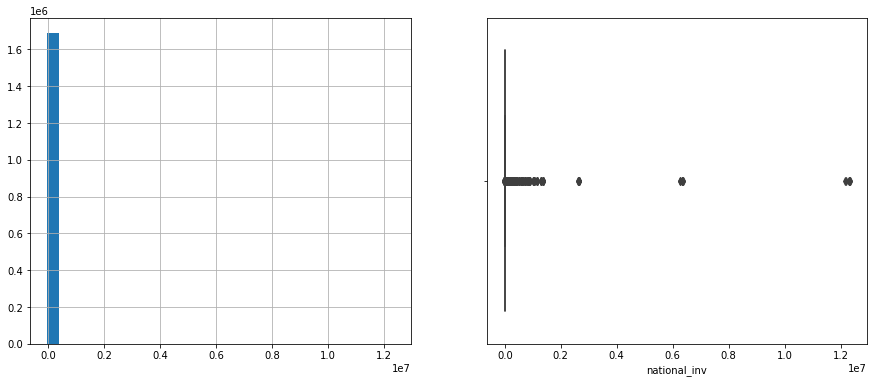

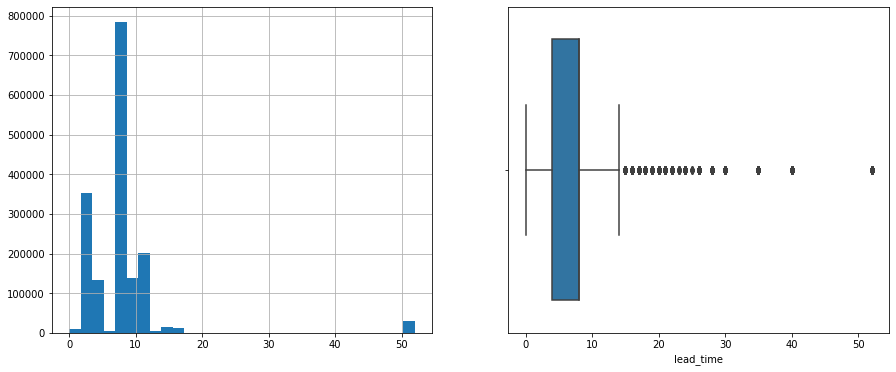

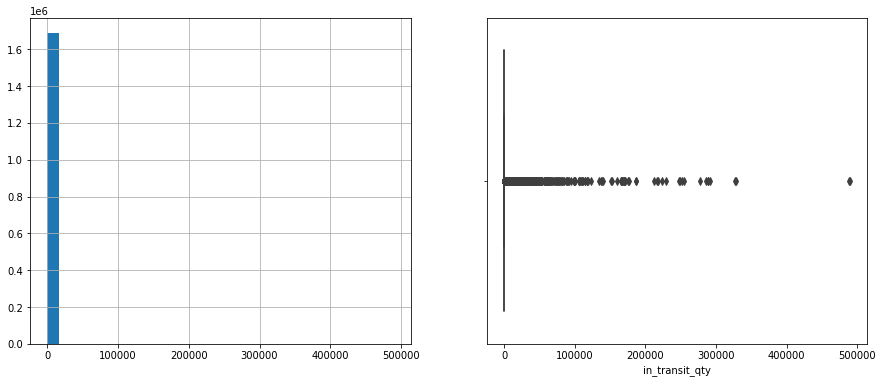

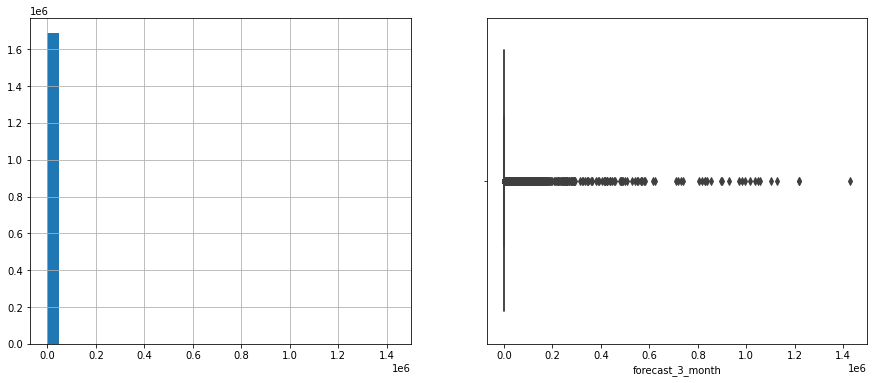

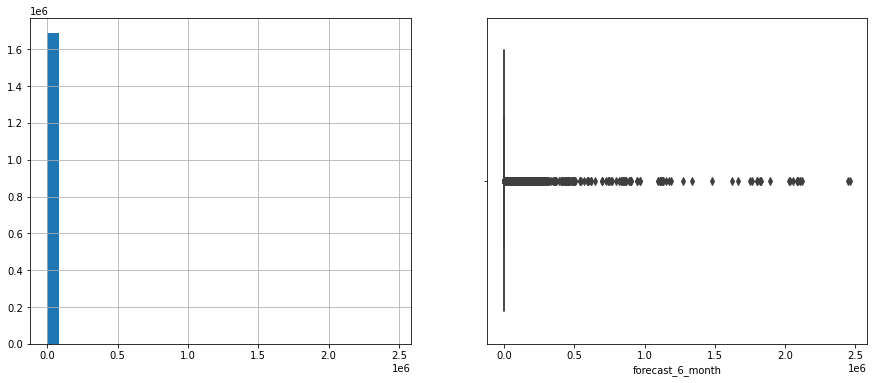

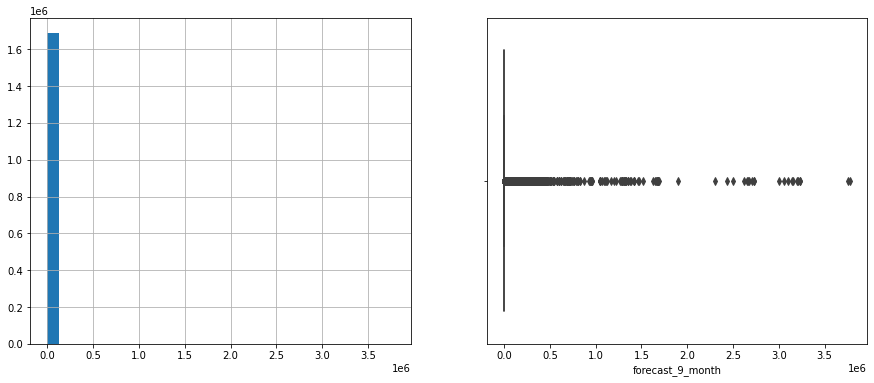

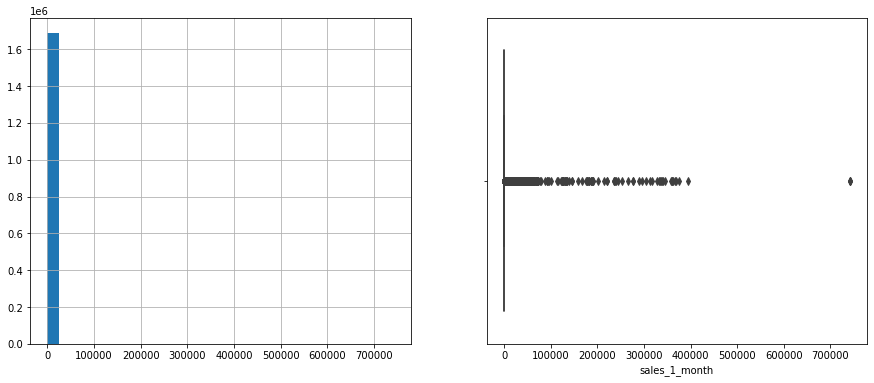

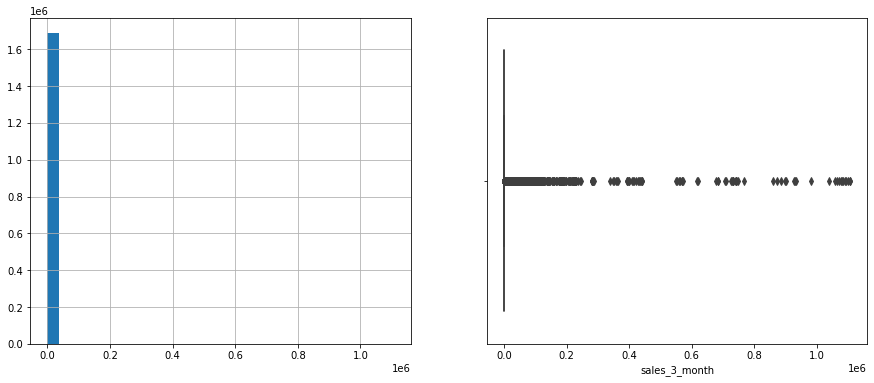

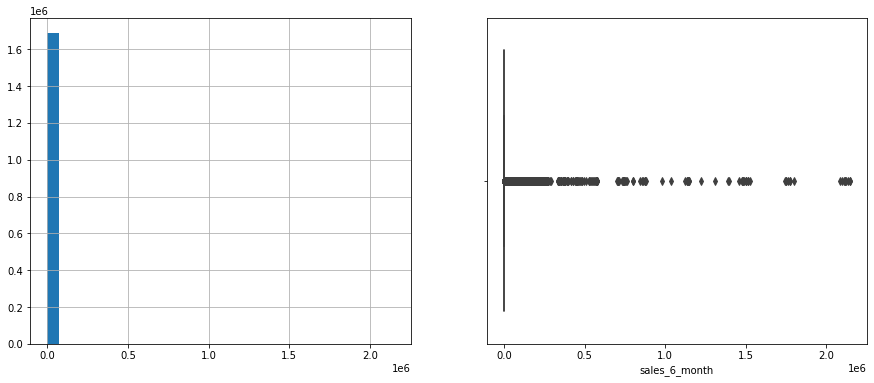

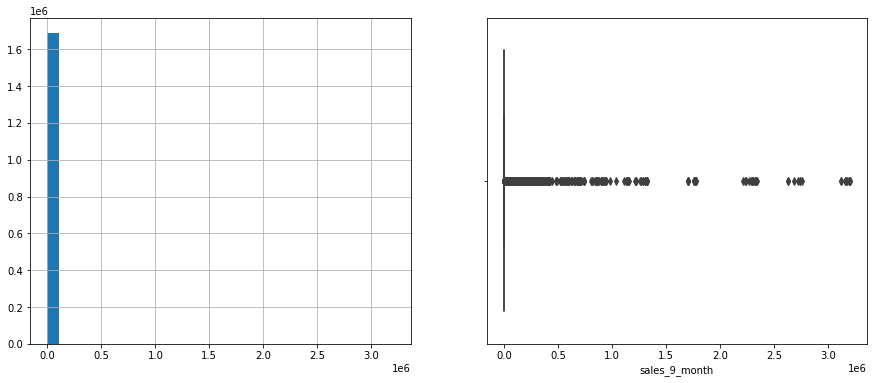

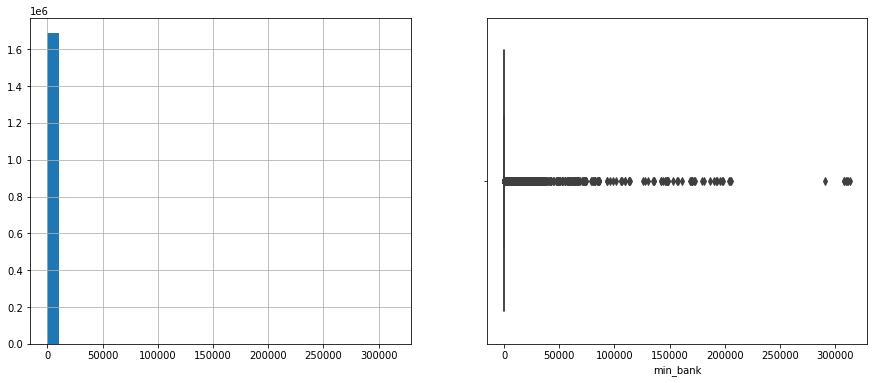

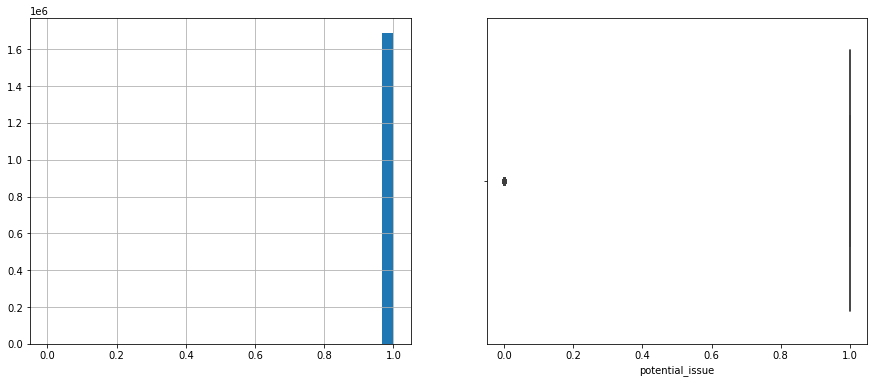

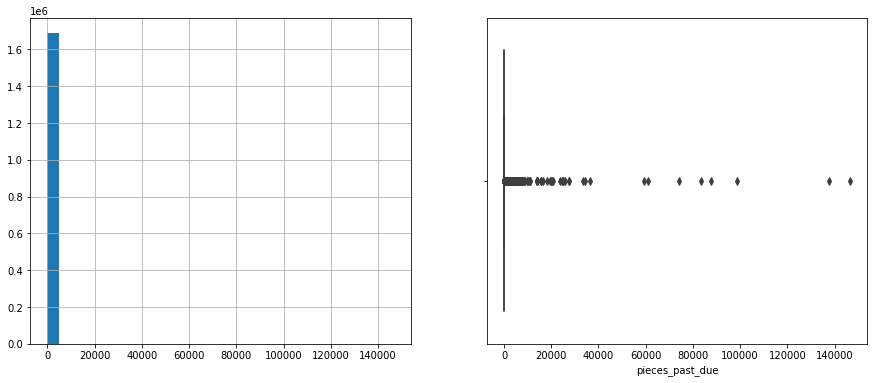

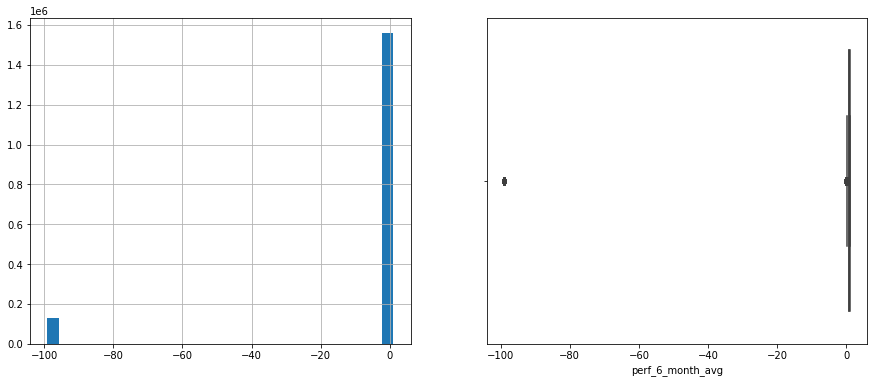

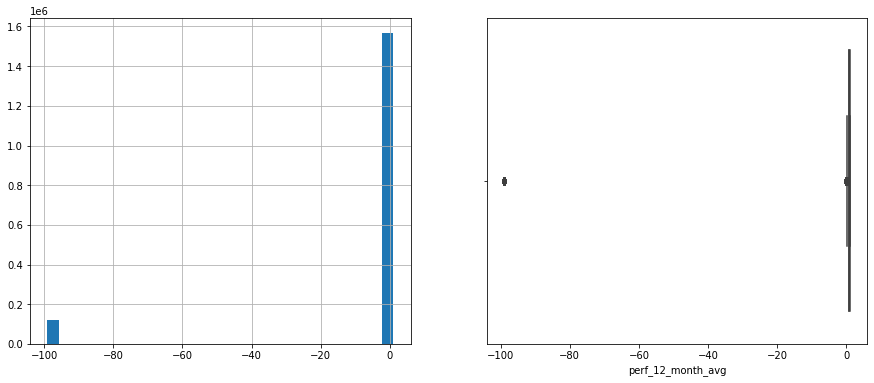

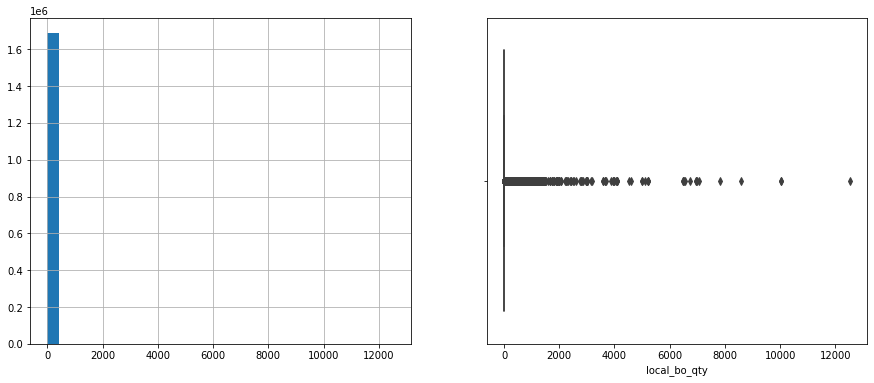

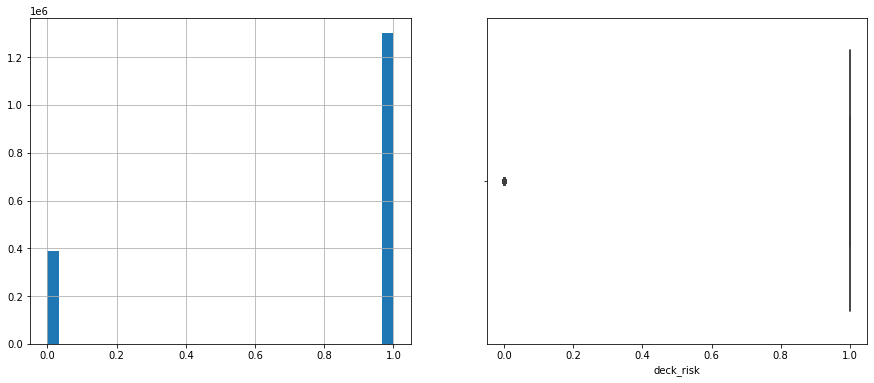

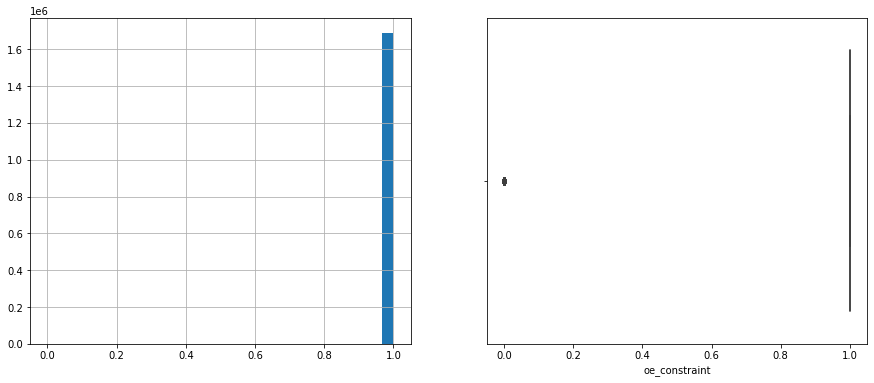

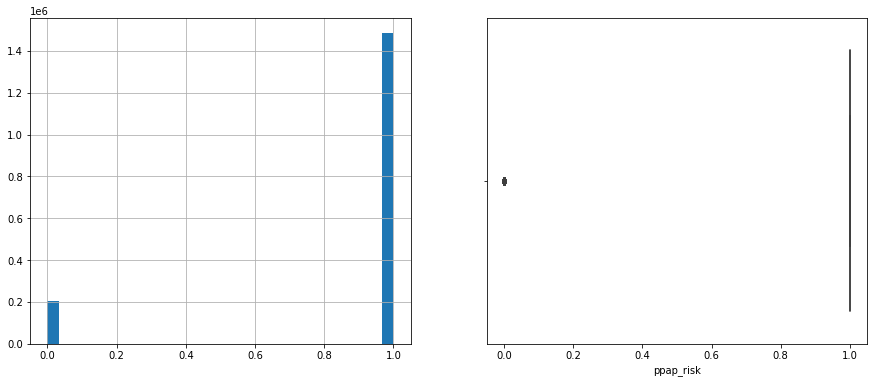

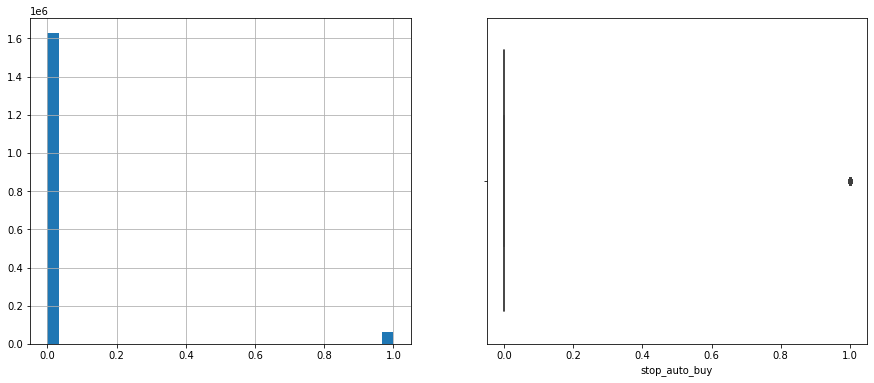

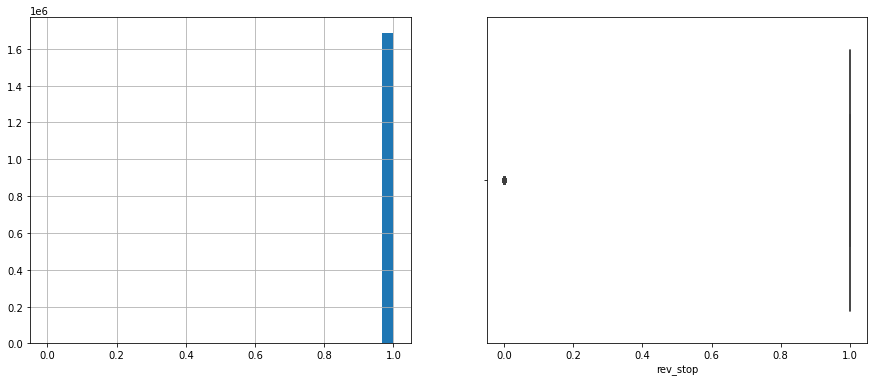

In [107]:
for i in Check_outliers:
   diagnostic_plots_outliers(X,i)

**As we can see from histogram and boxplots that due to the skewness in the data, there seems to be some outliers. That can be handled in the variable transformation**

##  **------------------------------------- Variable Transformation---------------------------------------------**

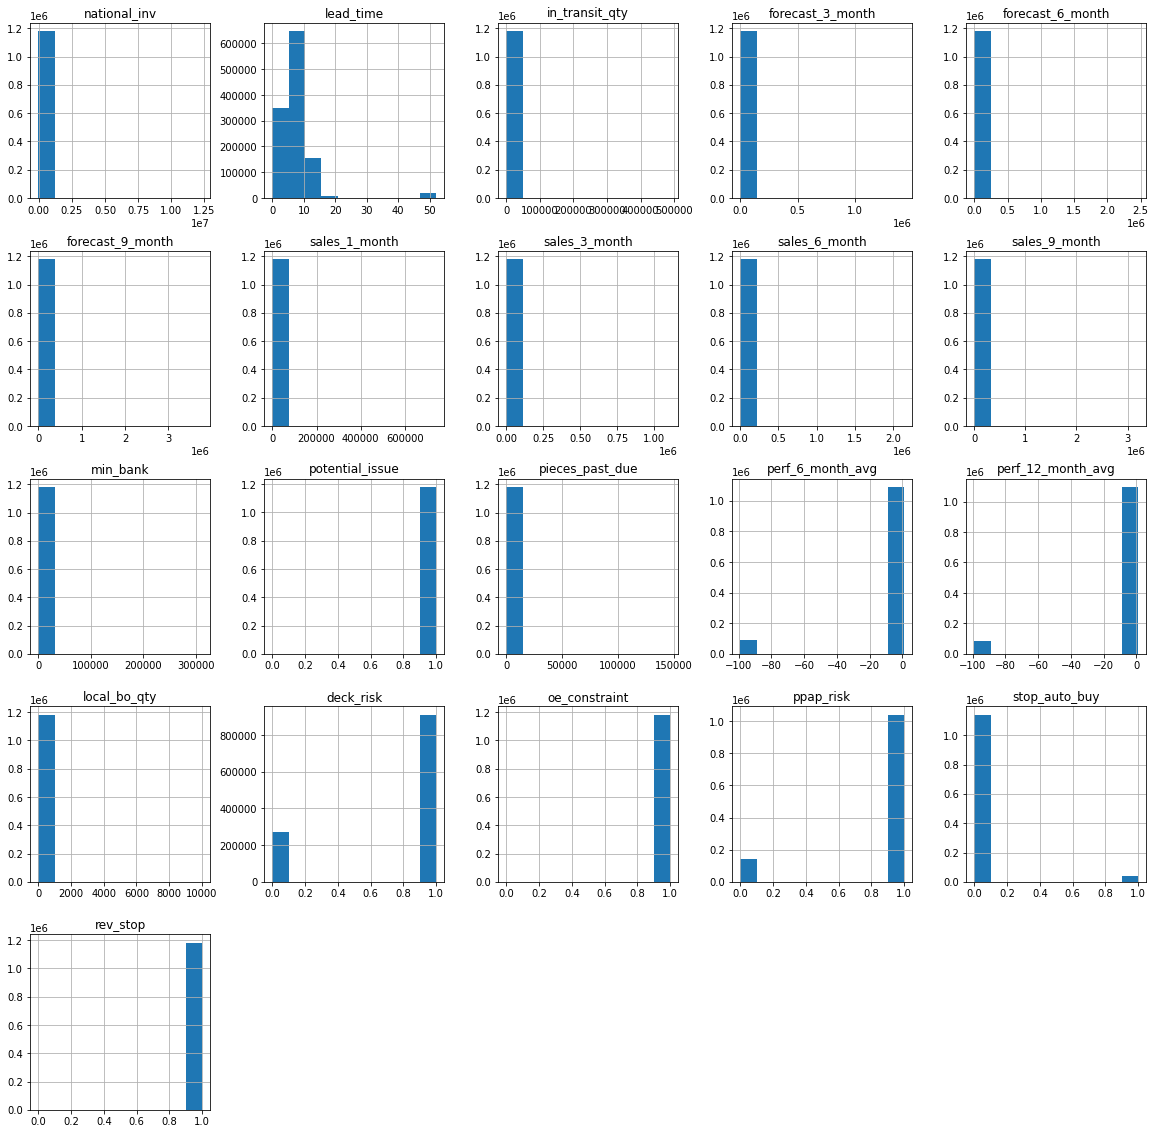

In [108]:
# let's explore the distribution of the numerical variables

x_train.hist(figsize=(20,20))
plt.show()

### Plots to assess normality

**To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles**

In [109]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### Original Distribution

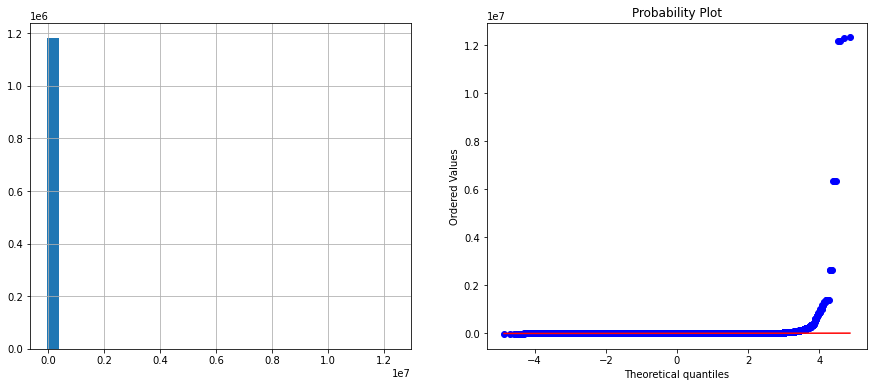

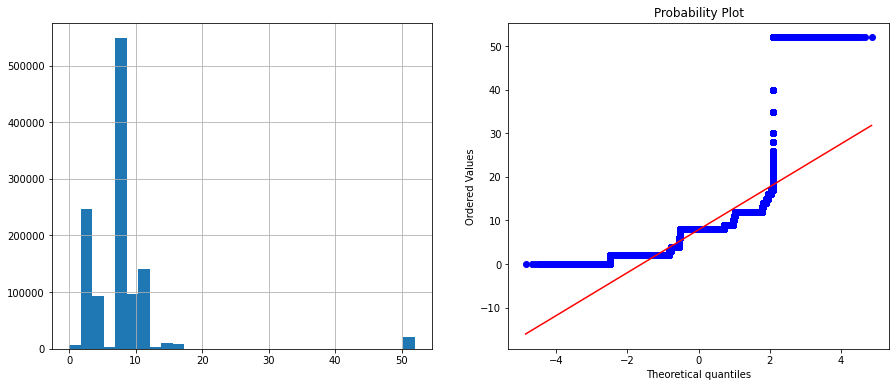

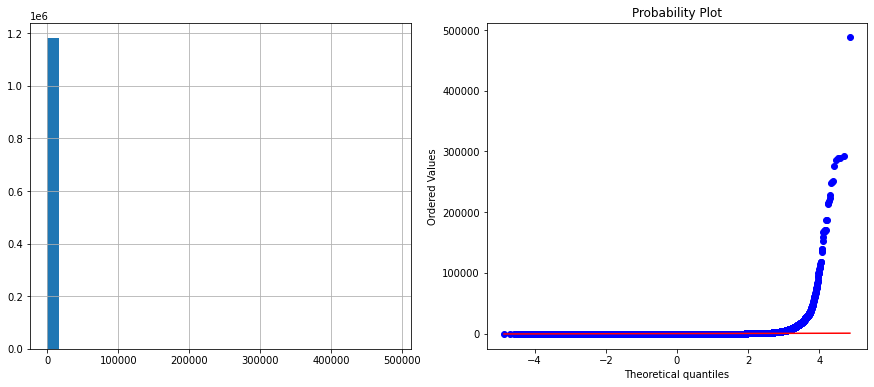

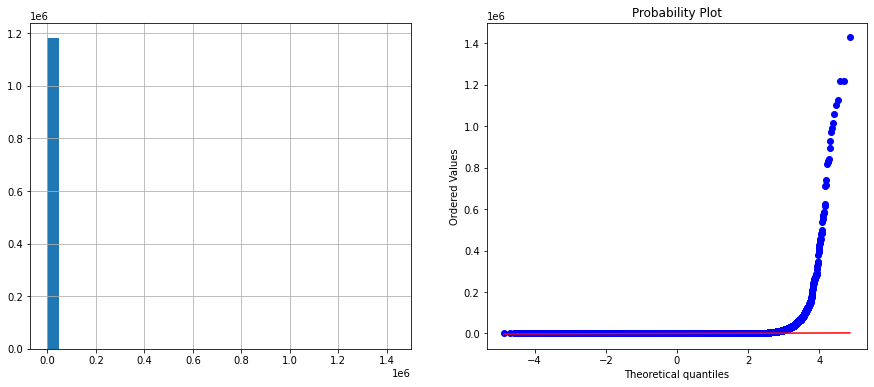

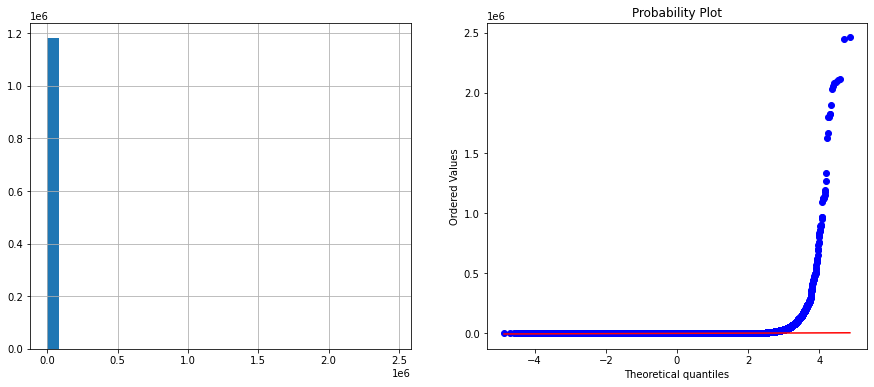

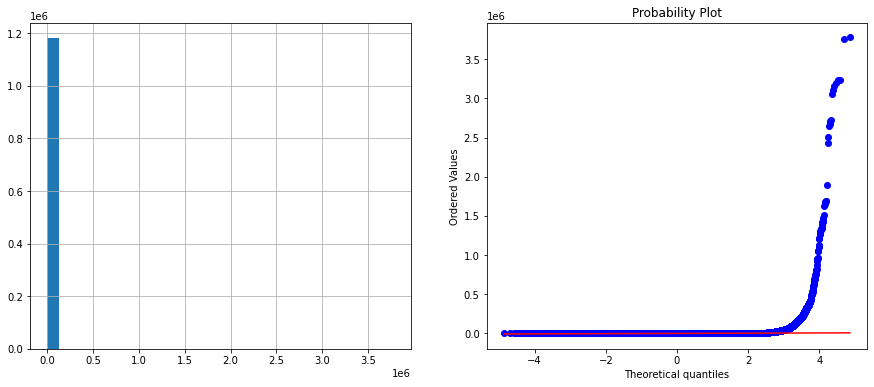

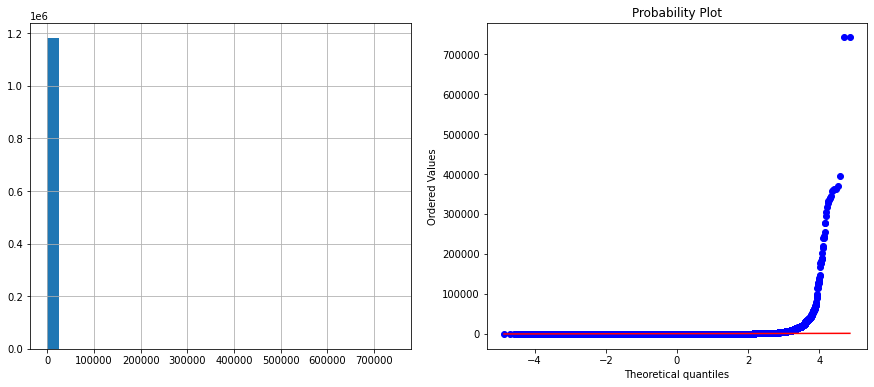

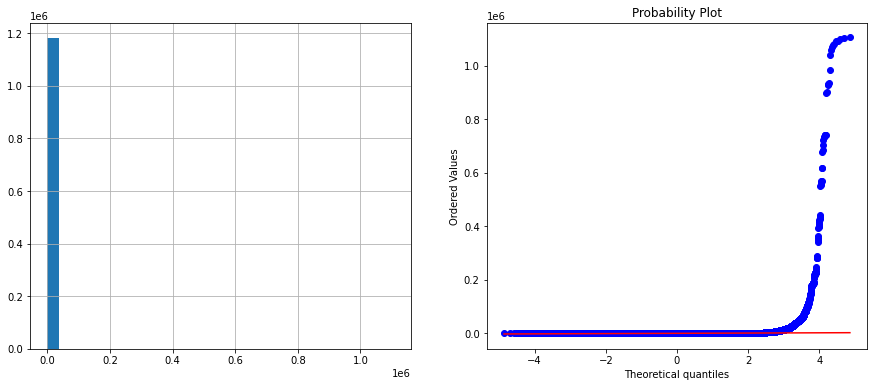

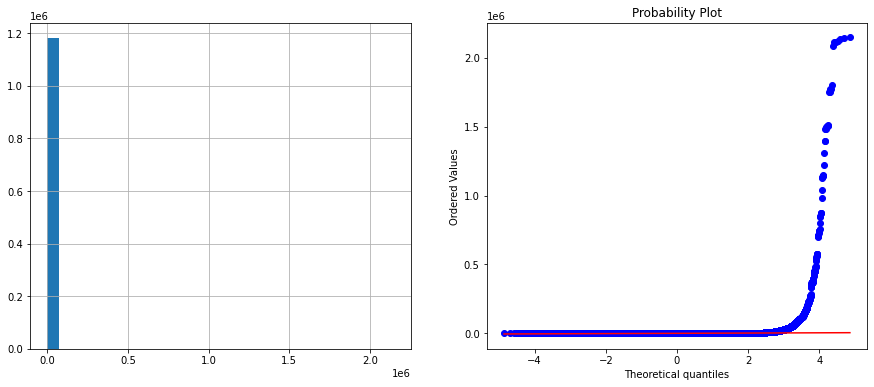

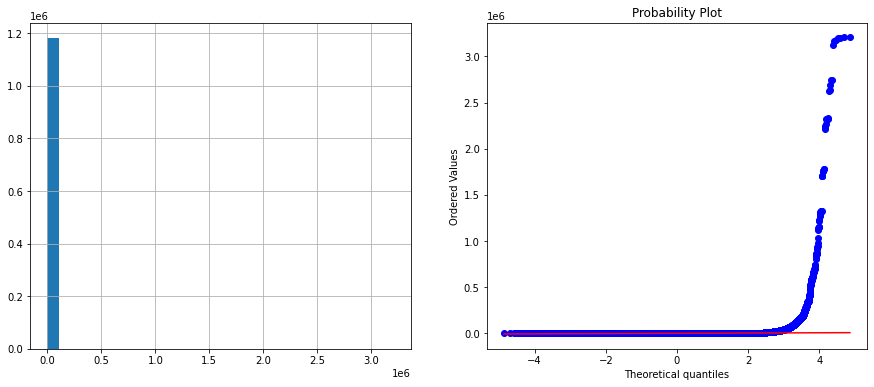

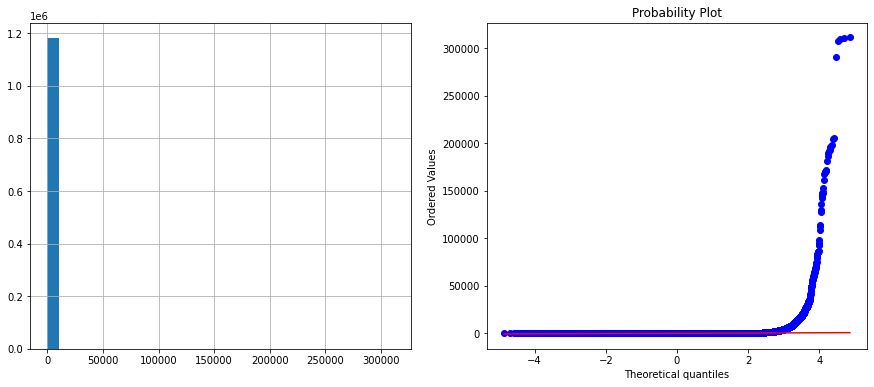

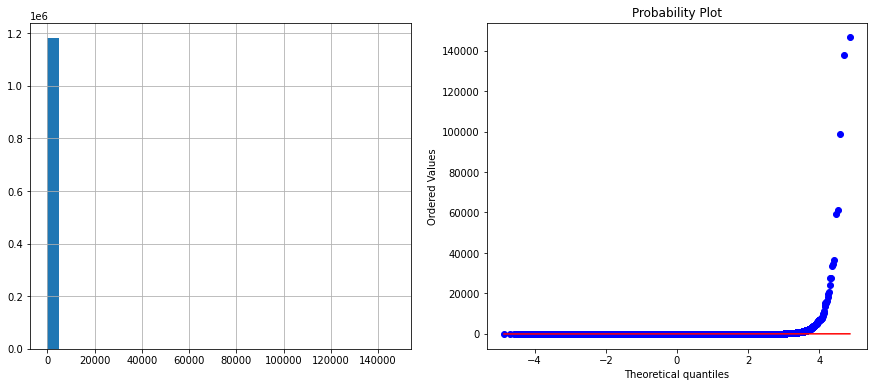

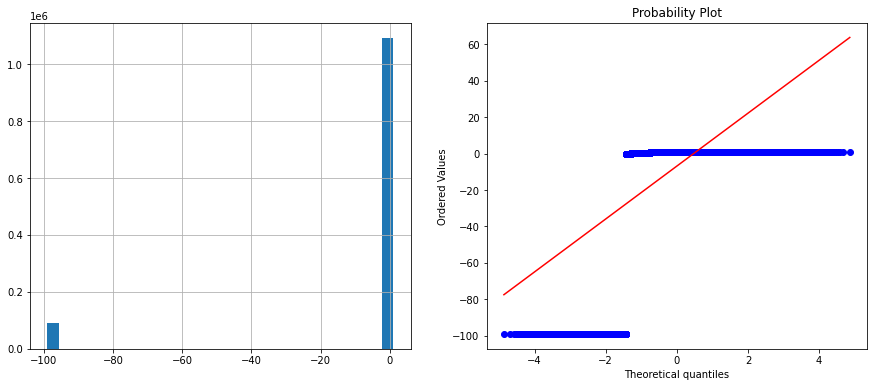

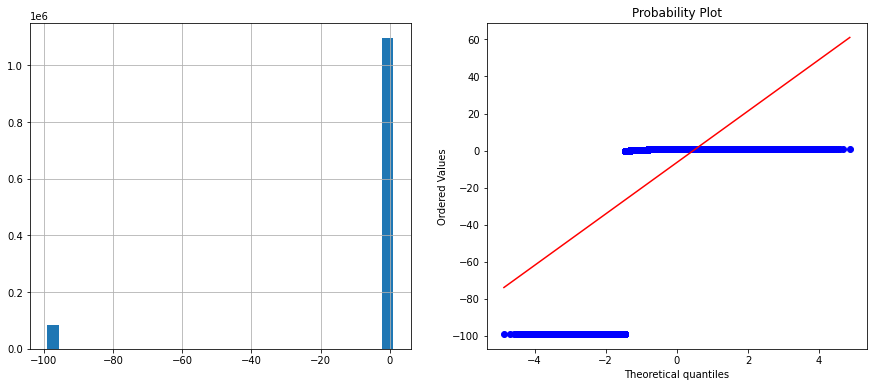

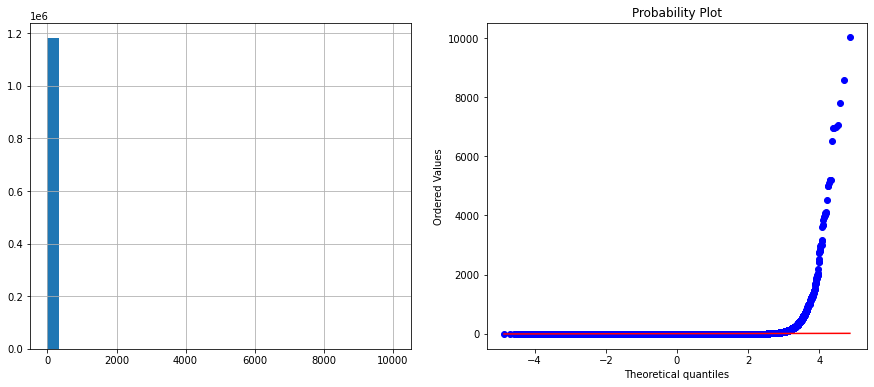

In [110]:
for i in Numerical_features:
    diagnostic_plots(x_train, i)

In [111]:
Numerical_features.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

We can't use log, exp and boxcox transformers as the lead_time has negative or zero values. so , i am using power and yeo johnson

#### Power Transformer

In [112]:
# set up the variable transformer
tf = vt.PowerTransformer(variables =['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'] , exp=0.5)  

# fit the transformer
tf.fit(x_train)

PowerTransformer(exp=0.5,
                 variables=['national_inv', 'lead_time', 'in_transit_qty',
                            'forecast_3_month', 'forecast_6_month',
                            'forecast_9_month', 'sales_1_month',
                            'sales_3_month', 'sales_6_month', 'sales_9_month',
                            'min_bank', 'pieces_past_due', 'perf_6_month_avg',
                            'perf_12_month_avg', 'local_bo_qty'])

In [113]:
# transform the data
train_t= tf.transform(x_train)

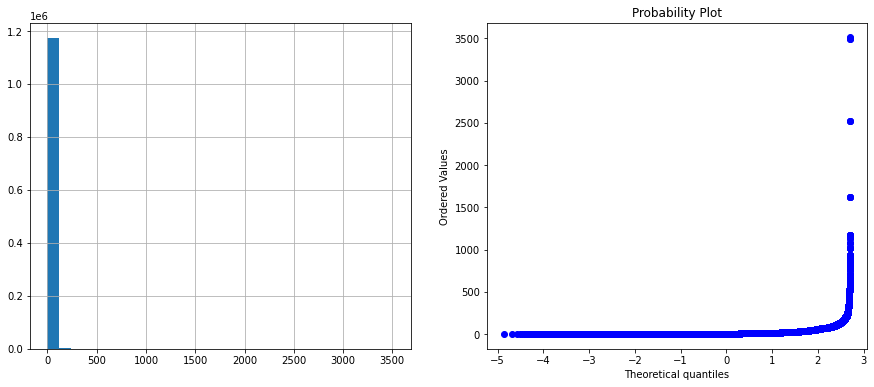

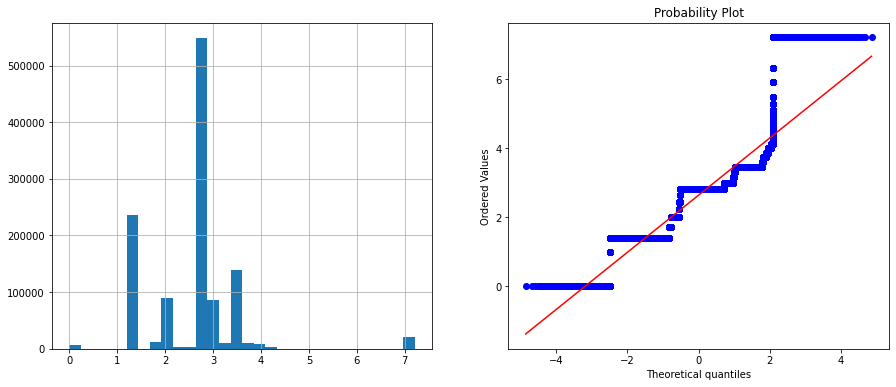

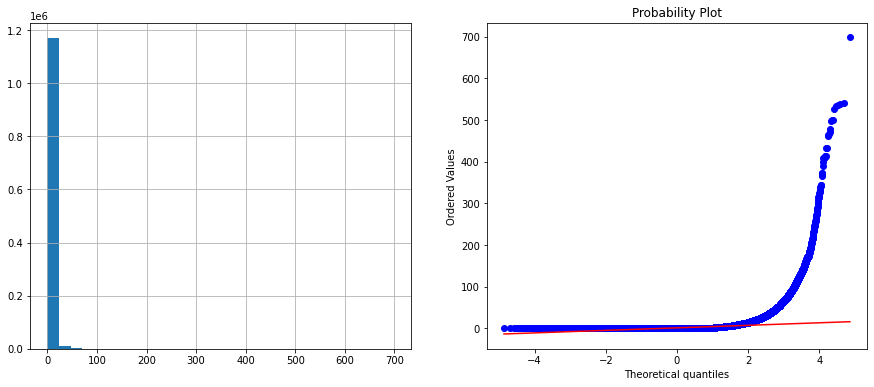

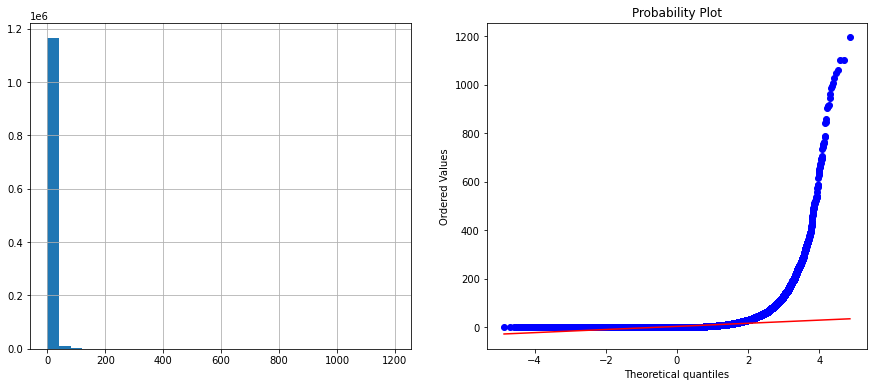

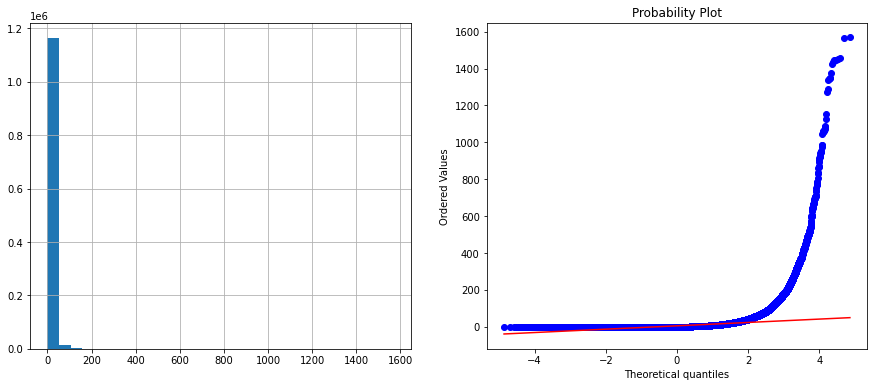

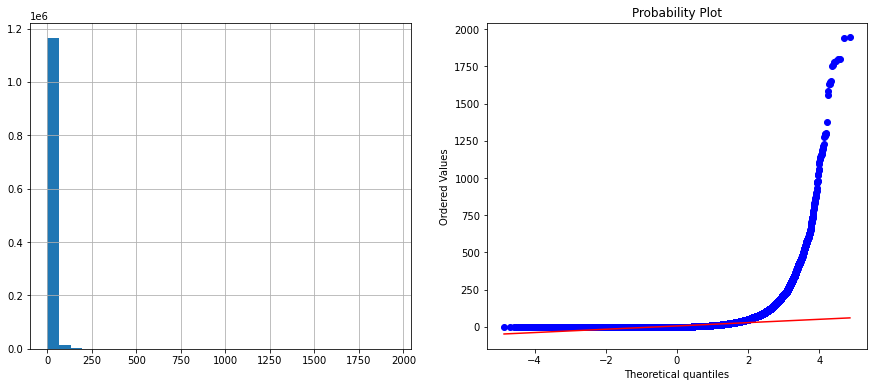

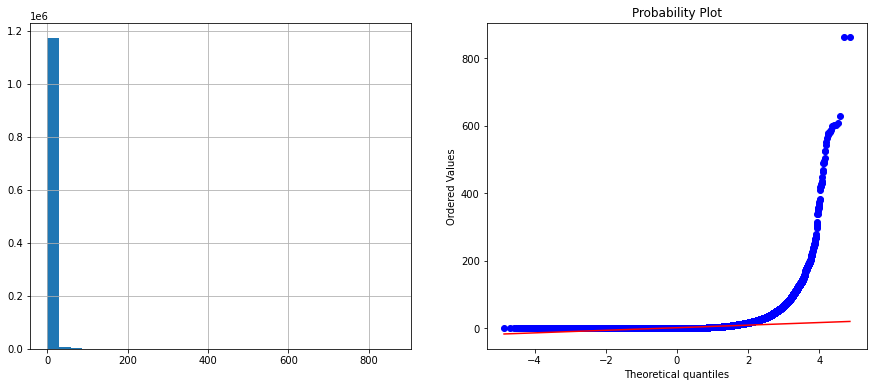

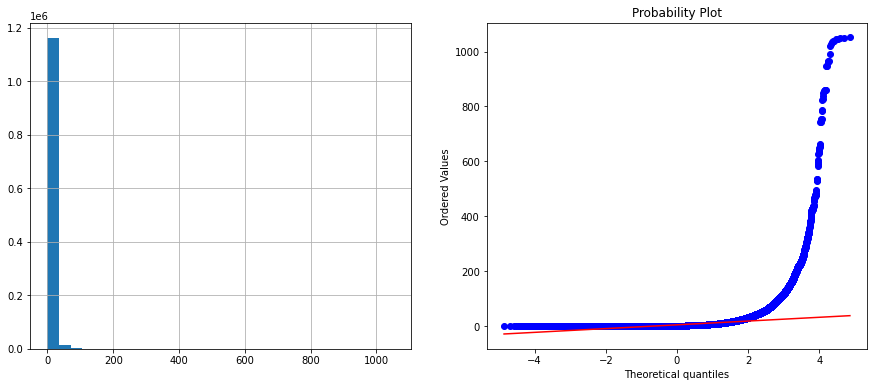

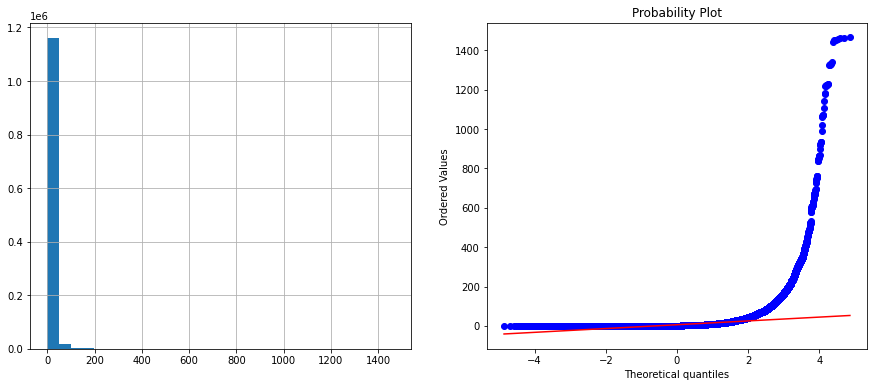

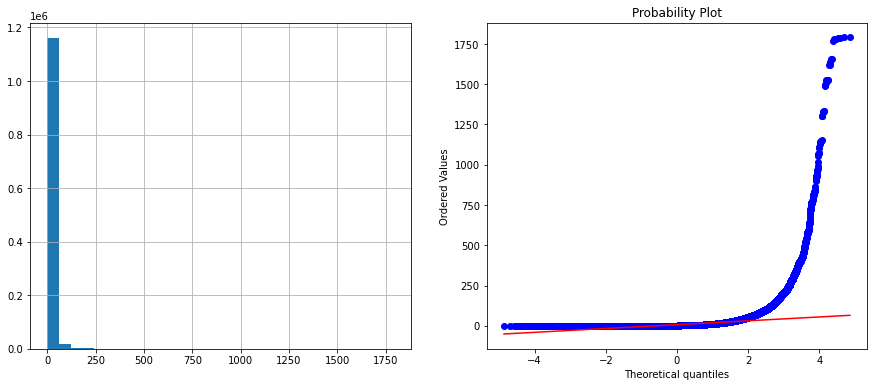

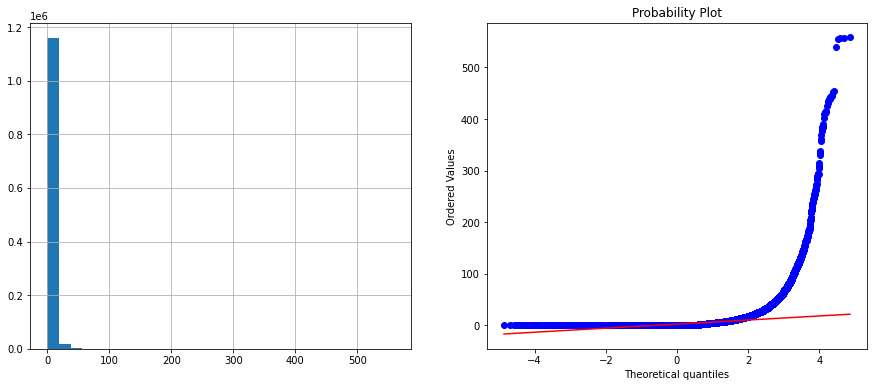

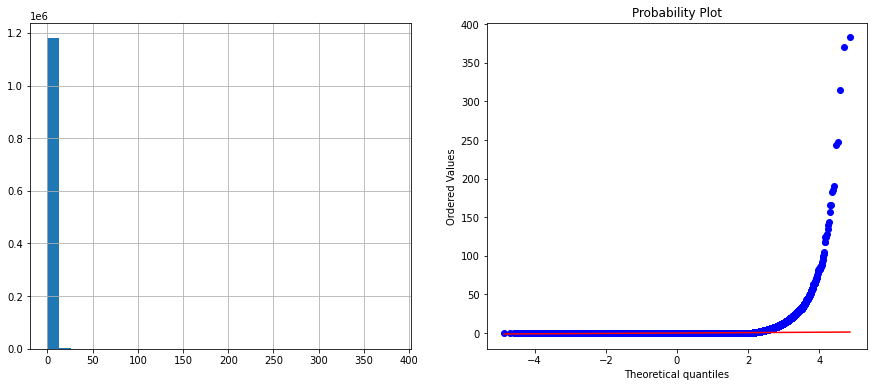

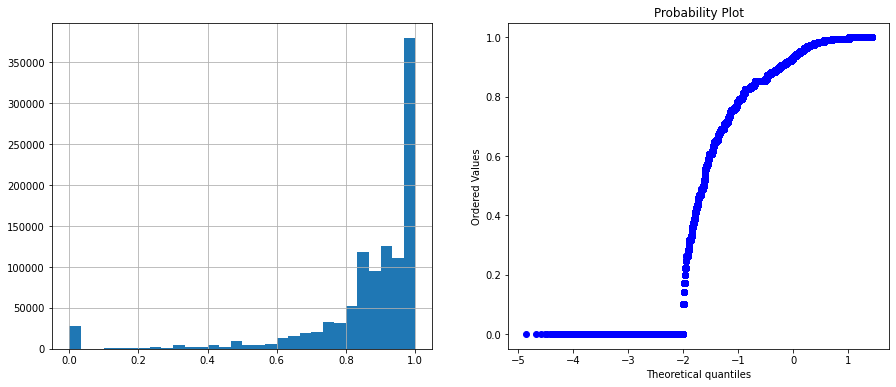

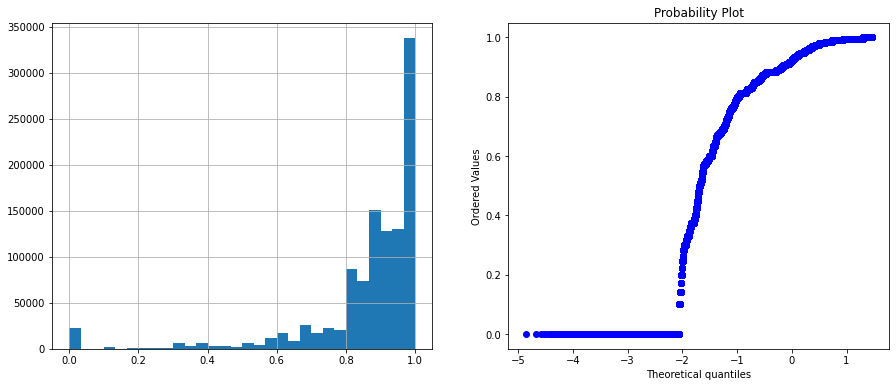

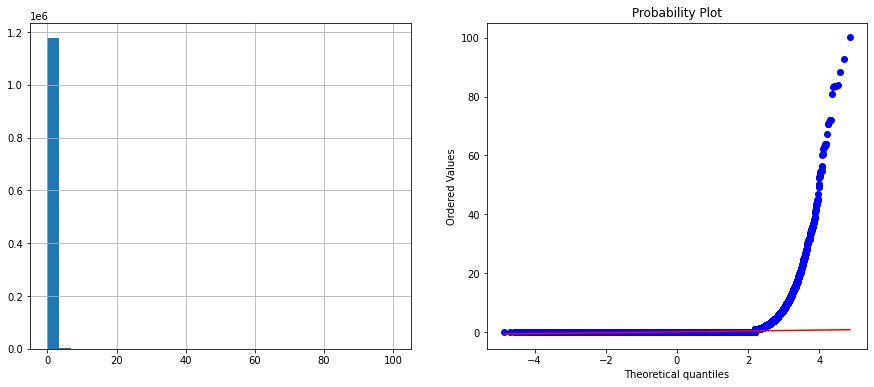

In [114]:
for i in Numerical_features:
    diagnostic_plots(train_t, i)

#### YeoJohnsonTransformer

In [115]:
# set up the variable transformer
YJT = vt.YeoJohnsonTransformer(variables =['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'])

# fit the transformer
YJT.fit(x_train)

# transform the data
train_YJT= YJT.transform(x_train)

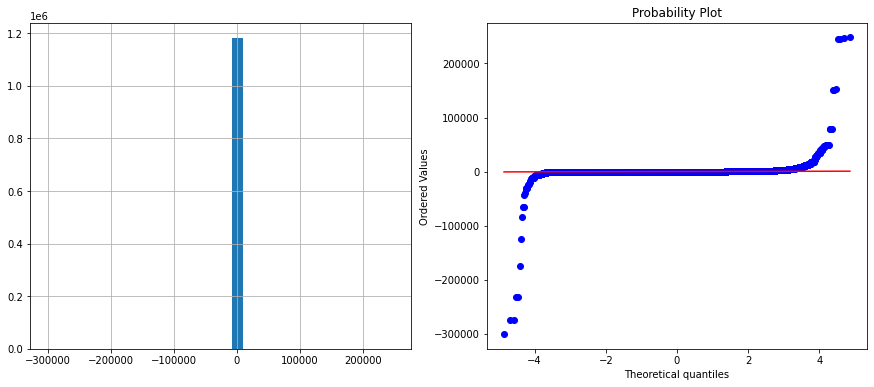

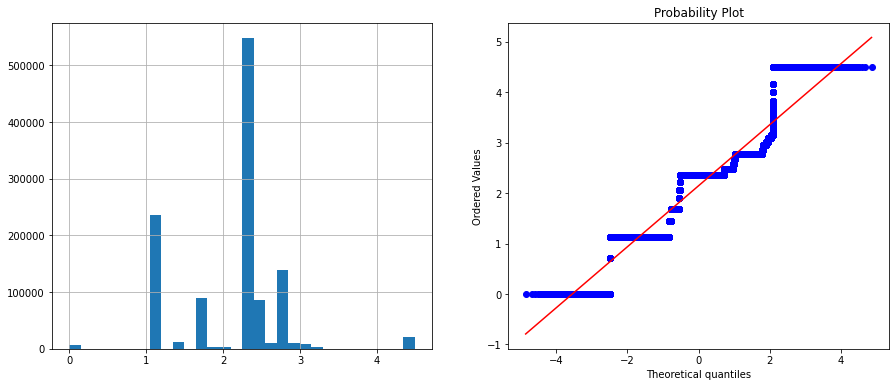

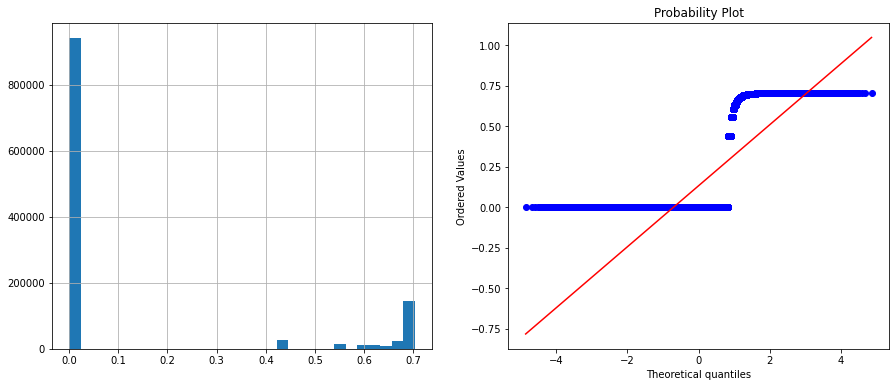

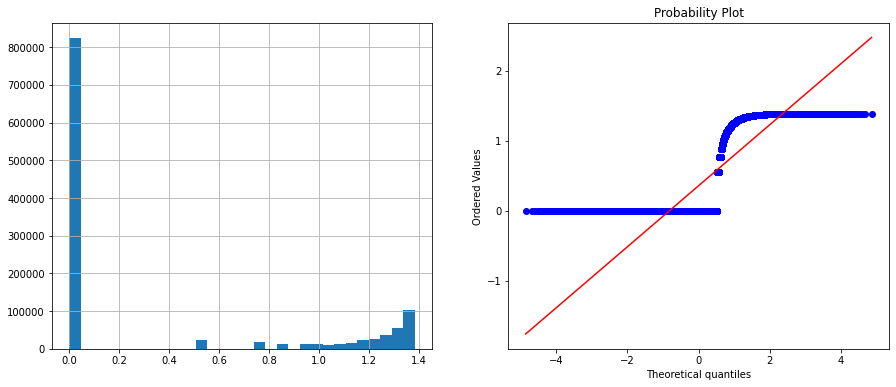

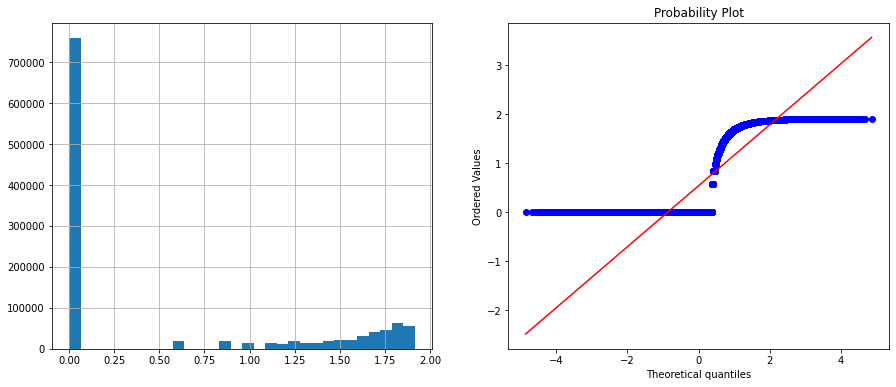

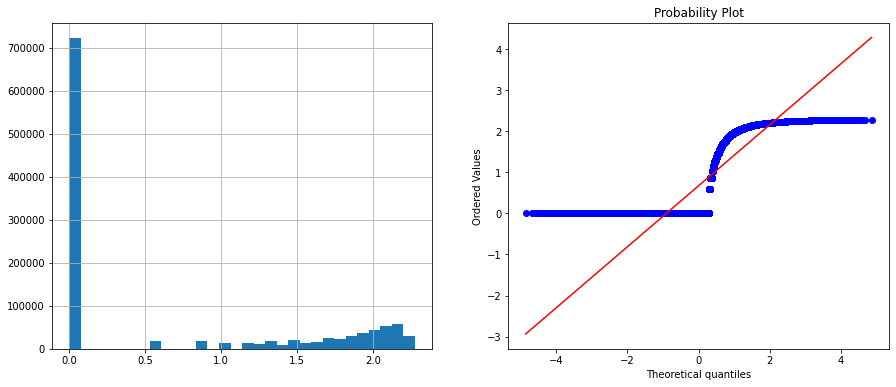

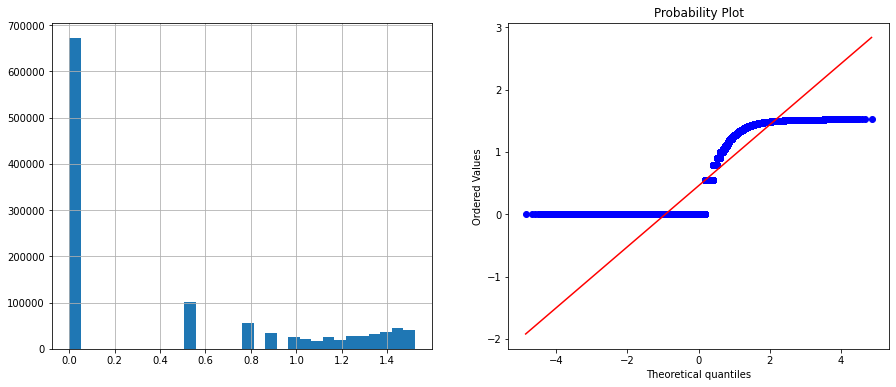

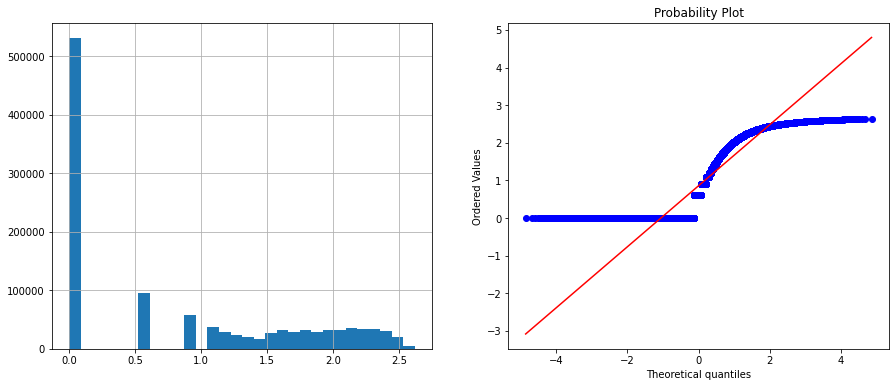

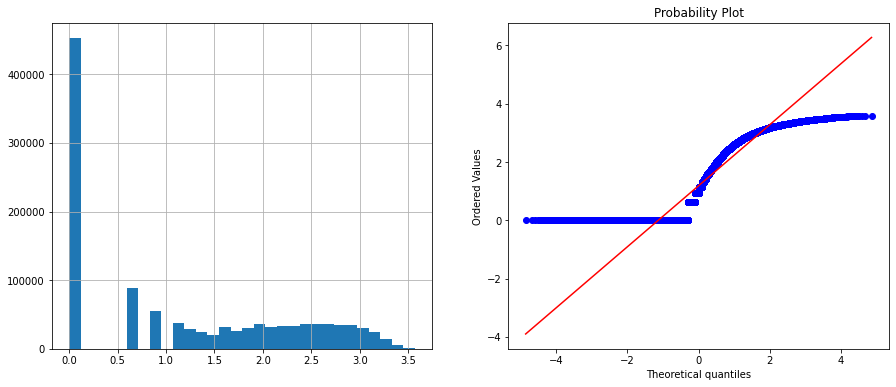

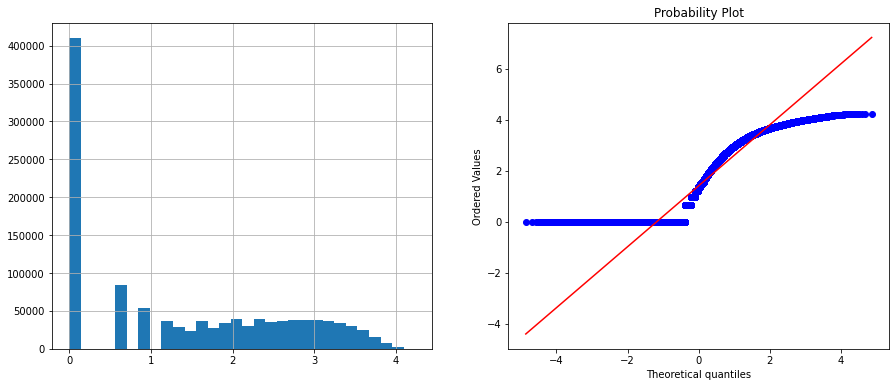

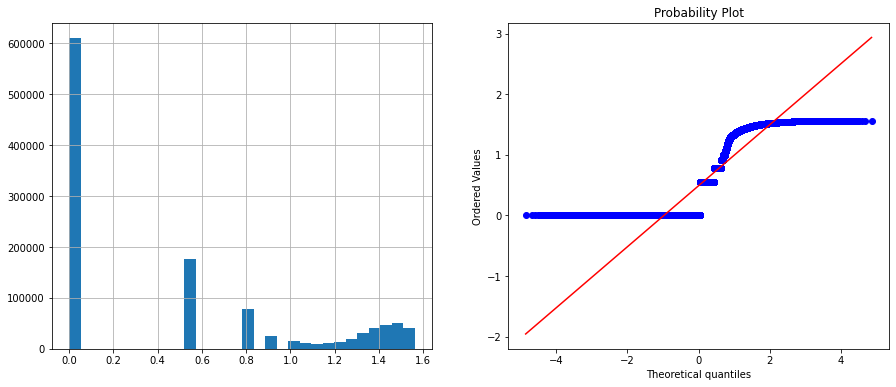

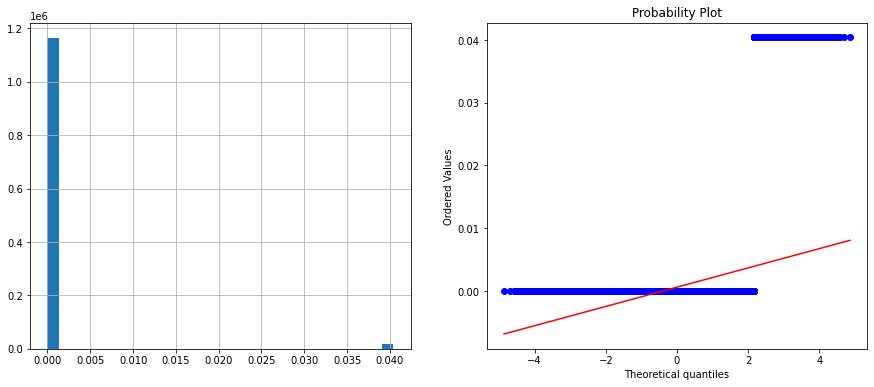

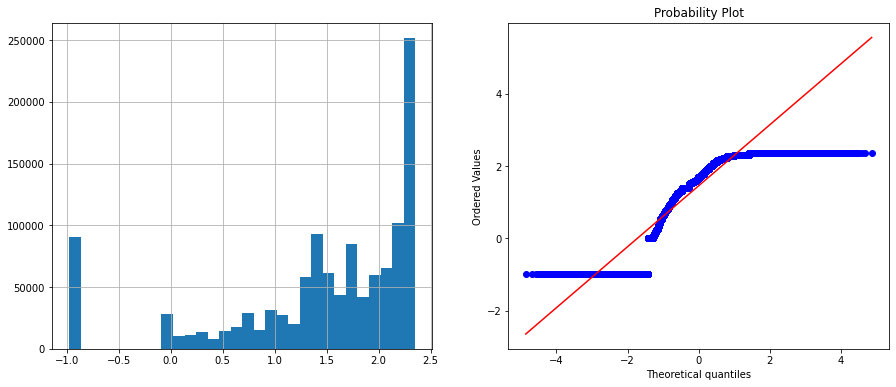

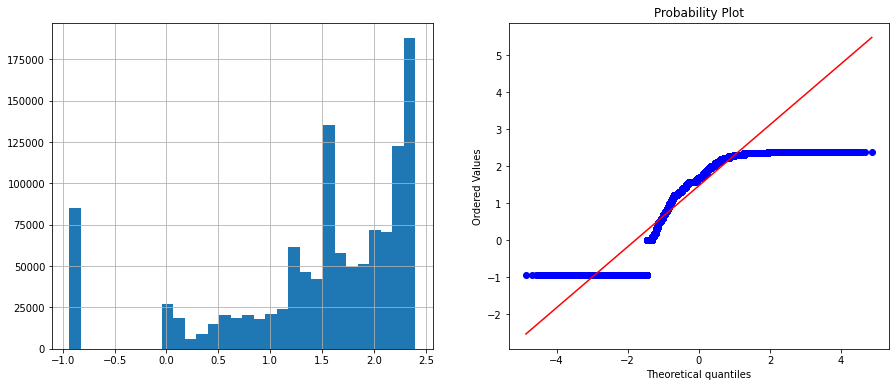

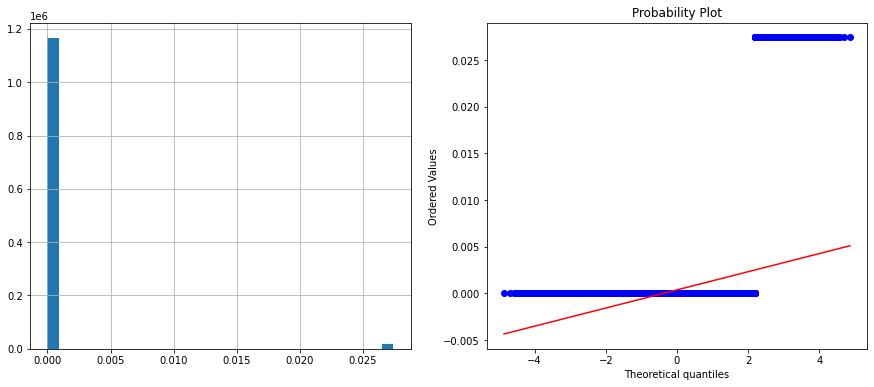

In [116]:
for i in Numerical_features:
    diagnostic_plots(train_YJT, i)

In [117]:
x_train_YJT = YJT.transform(x_train)
x_test_YJT=YJT.transform(x_test)

In [118]:
#now we will run the random forest algo for numerical transformation only
run_randomForests(x_train_YJT,x_test_YJT , y_train, y_test)

Train set
Random Forests roc-auc: 0.7817880297445425
Test set
Random Forests roc-auc: 0.7834680979045323


In [119]:
run_logistic(x_train_YJT,x_test_YJT , y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8274629030219622
Test set
Logistic Regression roc-auc: 0.8212591366630473


**we can see after numerical transformation logistic reggression roc_auc is increased from .66 to .83 .**

#**---------------------------Discretisation------------------------------**
As the variables are not skewed so we are going to use EqualWidth Discretisation from supervised

In [120]:
Numerical=['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty']

In [121]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualWidthDiscretiser(bins=10, variables = Numerical)

disc.fit(x_train_YJT)

EqualWidthDiscretiser(bins=10, return_boundaries=False, return_object=False,
                      variables=['national_inv', 'lead_time', 'in_transit_qty',
                                 'forecast_3_month', 'forecast_6_month',
                                 'forecast_9_month', 'sales_1_month',
                                 'sales_3_month', 'sales_6_month',
                                 'sales_9_month', 'min_bank', 'pieces_past_due',
                                 'perf_6_month_avg', 'perf_12_month_avg',
                                 'local_bo_qty'])

In [122]:
disc.binner_dict_

{'forecast_3_month': [-inf,
  0.1385393866835044,
  0.2770787733670088,
  0.4156181600505132,
  0.5541575467340176,
  0.692696933417522,
  0.8312363201010264,
  0.9697757067845308,
  1.1083150934680353,
  1.2468544801515398,
  inf],
 'forecast_6_month': [-inf,
  0.19167123433380867,
  0.38334246866761734,
  0.575013703001426,
  0.7666849373352347,
  0.9583561716690434,
  1.150027406002852,
  1.3416986403366606,
  1.5333698746704694,
  1.725041109004278,
  inf],
 'forecast_9_month': [-inf,
  0.22783282887336598,
  0.45566565774673196,
  0.6834984866200979,
  0.9113313154934639,
  1.13916414436683,
  1.3669969732401959,
  1.5948298021135618,
  1.8226626309869278,
  2.0504954598602936,
  inf],
 'in_transit_qty': [-inf,
  0.07033884822907625,
  0.1406776964581525,
  0.21101654468722875,
  0.281355392916305,
  0.3516942411453813,
  0.4220330893744575,
  0.49237193760353376,
  0.56271078583261,
  0.6330496340616862,
  inf],
 'lead_time': [-inf,
  0.44921966768402993,
  0.8984393353680599,
  

In [123]:
train_t = disc.transform(x_train_YJT)
test_t = disc.transform(x_test_YJT)

In [124]:
# for random forest
train_t_rf = disc.transform(x_train_YJT)
test_t_rf = disc.transform(x_test_YJT)

In [125]:
train_t_rf.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1509645,5,5,0,0,0,0,0,3,2,3,5,1,0,9,9,0,1,1,1,0,1
811557,5,5,0,0,0,0,0,2,3,3,0,1,0,0,0,0,0,1,0,0,1
1289827,5,2,0,0,0,0,9,8,8,8,8,1,0,9,8,0,1,1,1,0,1
95472,5,2,0,0,0,0,0,2,1,1,0,1,0,9,9,0,1,1,1,0,1
757193,5,5,9,7,6,6,0,4,4,3,0,1,0,9,7,0,0,1,1,0,1


In [126]:
train_t.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1509645,5,5,0,0,0,0,0,3,2,3,5,1,0,9,9,0,1,1,1,0,1
811557,5,5,0,0,0,0,0,2,3,3,0,1,0,0,0,0,0,1,0,0,1
1289827,5,2,0,0,0,0,9,8,8,8,8,1,0,9,8,0,1,1,1,0,1
95472,5,2,0,0,0,0,0,2,1,1,0,1,0,9,9,0,1,1,1,0,1
757193,5,5,9,7,6,6,0,4,4,3,0,1,0,9,7,0,0,1,1,0,1


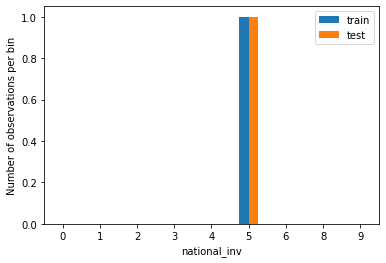

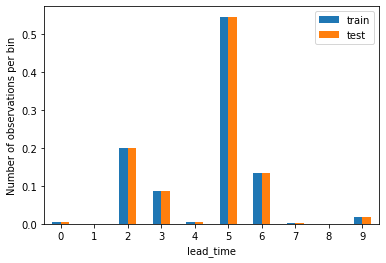

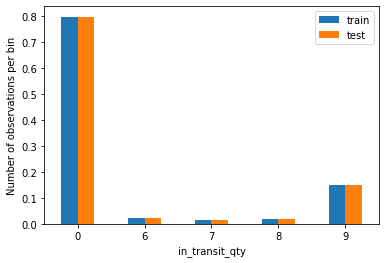

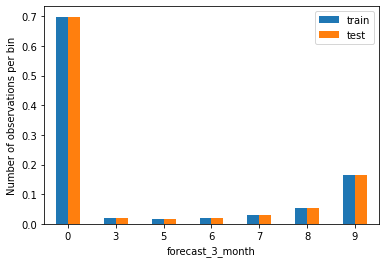

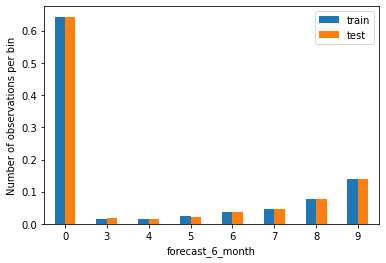

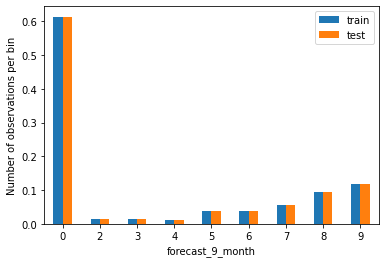

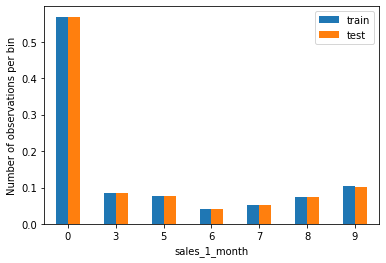

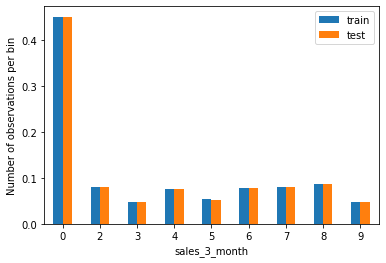

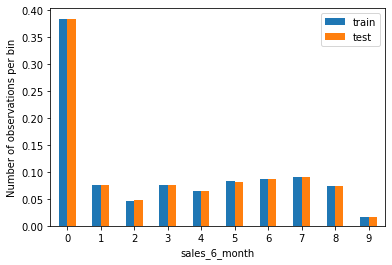

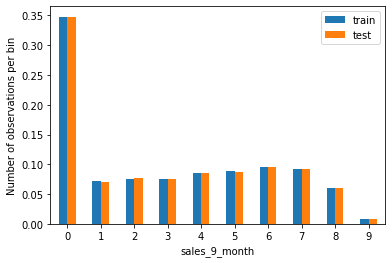

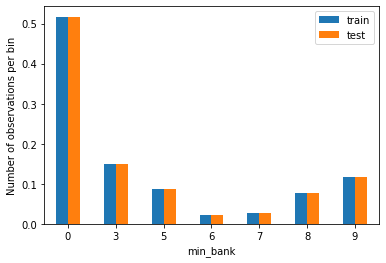

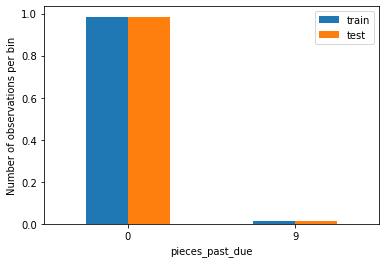

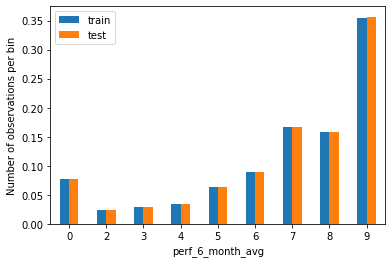

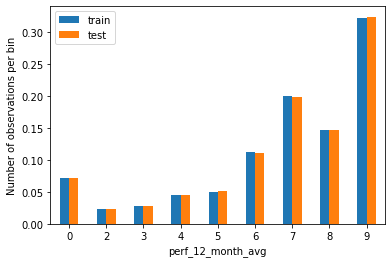

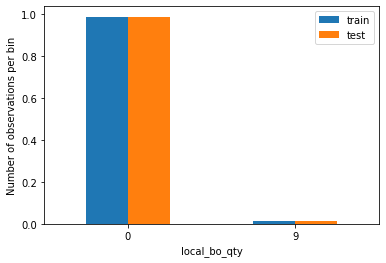

In [127]:
for i in Numerical:
    t1 = train_t.groupby([i])[i].count() / len(train_t)
    t2 = test_t.groupby([i])[i].count() / len(test_t)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

**descretisation with decision tree**

In [128]:
from feature_engine.discretisers import DecisionTreeDiscretiser

In [129]:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=3, scoring='accuracy',
                                   variables=Numerical,
                                   regression=False,
                                   param_grid={'max_depth': [ 2, 3],
                                              'min_samples_leaf':[10,4]})

treeDisc.fit(x_train_YJT, y_train)

DecisionTreeDiscretiser(cv=3,
                        param_grid={'max_depth': [2, 3],
                                    'min_samples_leaf': [10, 4]},
                        random_state=None, regression=False, scoring='accuracy',
                        variables=['national_inv', 'lead_time',
                                   'in_transit_qty', 'forecast_3_month',
                                   'forecast_6_month', 'forecast_9_month',
                                   'sales_1_month', 'sales_3_month',
                                   'sales_6_month', 'sales_9_month', 'min_bank',
                                   'pieces_past_due', 'perf_6_month_avg',
                                   'perf_12_month_avg', 'local_bo_qty'])

In [130]:
# for random forest
train_t_des_rf = treeDisc.transform(x_train_YJT)
test_t_des_rf = treeDisc.transform(x_test_YJT)

In [131]:
#lets transform the data

X_train_des_t = treeDisc.transform(x_train_YJT)
X_test_des_t = treeDisc.transform(x_test_YJT)

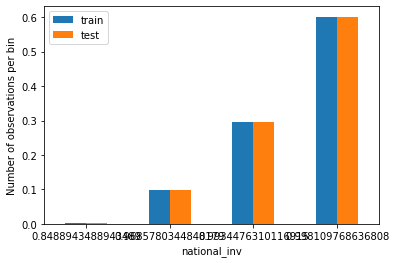

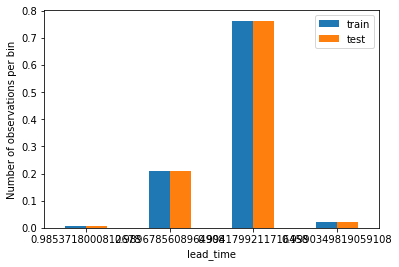

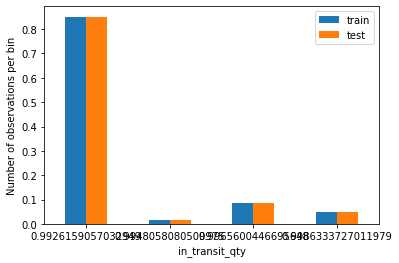

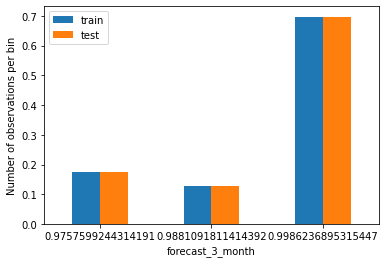

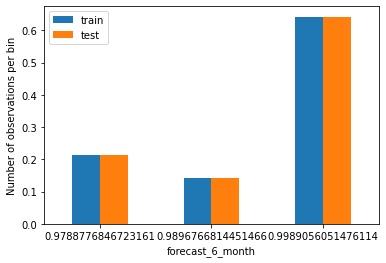

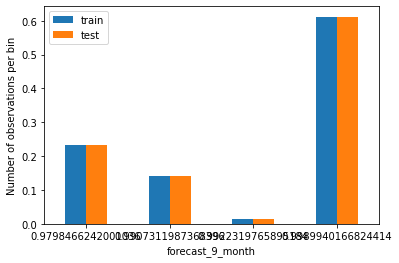

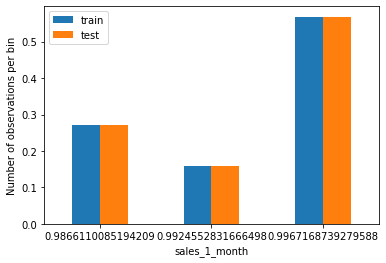

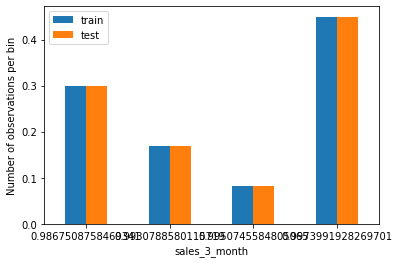

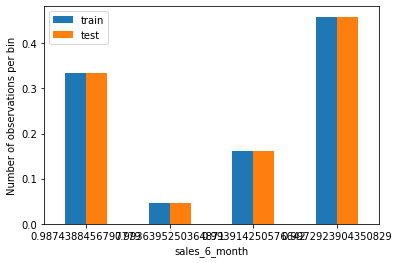

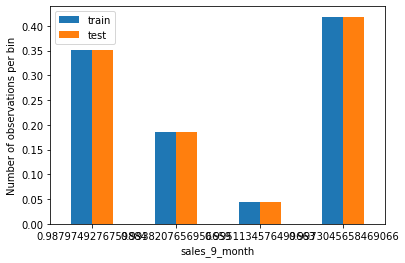

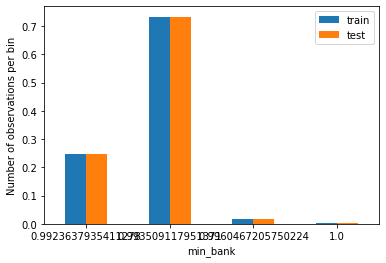

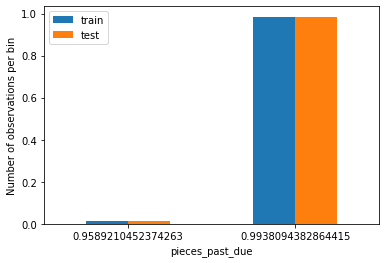

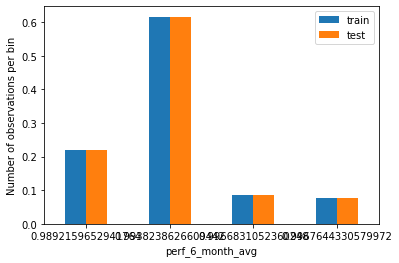

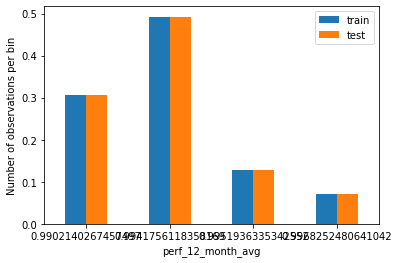

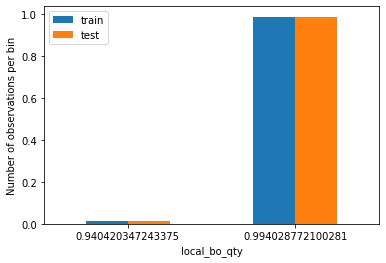

In [132]:

for i in Numerical:
    t1 = X_train_des_t.groupby([i])[i].count() / len(X_train_des_t)
    t2 = X_train_des_t.groupby([i])[i].count() / len(X_train_des_t)

    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

now checking performence for equal width descritisation and descision tree descritisation by both random forest and logistic reggression

In [133]:
run_logistic(train_t,test_t , y_train, y_test)          #logistic with equal width

Train set
Logistic Regression roc-auc: 0.8678717747774698
Test set
Logistic Regression roc-auc: 0.8625742924821529


In [134]:
run_logistic(X_train_des_t,X_test_des_t , y_train, y_test)      #logistic with decision tree desc

Train set
Logistic Regression roc-auc: 0.8686955184576313
Test set
Logistic Regression roc-auc: 0.8616119936130684


In [135]:
run_randomForests(train_t_rf,test_t_rf , y_train, y_test)           #random forest with equal width

Train set
Random Forests roc-auc: 0.7567666638784587
Test set
Random Forests roc-auc: 0.7567149568343365


**As we can see that there is an increse in performance with decision tree and equal width descritisation in logistic regression from .83 to .86.
But in case of random forest, performence has dropped after descritisation and also equal bin descritisation is not suitable for tree based algorithm.**

## **------------------------------------------Scaling---------------------------------------------------**

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scalar = StandardScaler()

In [138]:
#for random forest
X_scaled = pd.DataFrame(scalar.fit_transform(x_train),columns=X.columns)
X_scaled

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,-0.017859,0.017112,-0.033176,-0.034874,-0.034935,-0.035087,-0.028805,-0.032995,-0.035177,-0.035162,-0.039439,0.023061,-0.008477,0.294045,0.285753,-0.019033,0.545566,0.012378,0.370866,-0.193932,0.020801
1,-0.017212,0.017112,-0.033176,-0.034874,-0.034935,-0.035087,-0.028805,-0.033188,-0.035072,-0.034957,-0.041836,0.023061,-0.008477,-3.470779,-3.583335,-0.019033,-1.832959,0.012378,-2.696391,-0.193932,0.020801
2,0.012159,-0.858634,-0.033176,-0.034874,-0.034935,-0.035087,-0.004888,0.003107,0.006512,0.019490,-0.020265,0.023061,-0.008477,0.294798,0.283431,-0.019033,0.545566,0.012378,0.370866,-0.193932,0.020801
3,-0.015956,-0.858634,-0.033176,-0.034874,-0.034935,-0.035087,-0.028805,-0.033188,-0.035281,-0.035367,-0.041836,0.023061,-0.008477,0.295928,0.287302,-0.019033,0.545566,0.012378,0.370866,-0.193932,0.020801
4,-0.018087,0.163069,-0.022615,-0.033311,-0.034125,-0.034531,-0.028805,-0.032609,-0.034758,-0.035025,-0.041836,0.023061,-0.008477,0.294045,0.279560,-0.019033,-1.832959,0.012378,0.370866,-0.193932,0.020801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181497,-0.018087,0.017112,-0.033176,-0.034874,-0.034935,-0.035087,-0.028805,-0.033381,-0.035386,-0.035436,-0.041836,0.023061,-0.008477,0.290278,0.280721,-0.019033,0.545566,0.012378,0.370866,-0.193932,0.020801
1181498,-0.017973,0.017112,-0.033176,-0.034874,-0.034935,-0.035087,-0.028805,-0.033381,-0.035386,-0.035436,-0.041836,0.023061,-0.008477,0.275963,0.262527,-0.019033,-1.832959,0.012378,0.370866,-0.193932,0.020801
1181499,-0.011923,0.163069,-0.027141,0.004214,0.005555,-0.007325,-0.013207,-0.012338,-0.010666,-0.010811,0.004501,0.023061,-0.008477,0.294421,0.283431,-0.019033,0.545566,0.012378,0.370866,-0.193932,0.020801
1181500,-0.018049,0.600942,-0.033176,-0.034874,-0.034935,-0.035087,-0.028805,-0.033381,-0.035281,-0.035367,-0.041836,0.023061,-0.008477,0.288017,0.279173,-0.019033,0.545566,0.012378,0.370866,-0.193932,0.020801


In [139]:
#X_scaled = scalar.transform(x_train)
X_scaled_test = scalar.transform(x_test)

In [140]:
#for logistic regression
X_scaled_log = pd.DataFrame(scalar.fit_transform(X_train_des_t),columns=X.columns)
X_scaled_log_test = scalar.transform(X_test_des_t)
X_scaled_log

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,0.013527,0.425991,-0.402171,0.608656,0.688442,0.720746,0.788572,-1.436441,0.081876,-1.292914,-1.361545,0.023061,0.123659,0.225046,0.413207,0.118697,0.545566,0.012378,0.370866,-0.193932,0.020801
1,0.398877,0.425991,-0.402171,0.608656,0.688442,0.720746,0.788572,0.393699,-1.346002,-1.292914,0.333137,0.023061,0.123659,1.450781,1.641112,0.118697,-1.832959,0.012378,-2.696391,-0.193932,0.020801
2,0.398877,-1.714240,-0.402171,0.608656,0.688442,0.720746,-0.190358,-0.045099,0.145139,0.130726,-1.361545,0.023061,0.123659,0.225046,0.413207,0.118697,0.545566,0.012378,0.370866,-0.193932,0.020801
3,0.398877,-1.714240,-0.402171,0.608656,0.688442,0.720746,0.788572,0.393699,0.923049,0.979137,0.333137,0.023061,0.123659,0.225046,0.413207,0.118697,0.545566,0.012378,0.370866,-0.193932,0.020801
4,-2.042072,0.425991,1.972172,-1.997506,-1.764236,-1.696119,0.788572,-1.436441,-1.346002,-1.292914,0.333137,0.023061,0.123659,0.225046,0.884983,0.118697,-1.832959,0.012378,0.370866,-0.193932,0.020801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181497,-2.042072,0.425991,-0.402171,0.608656,0.688442,0.720746,0.788572,0.904819,0.923049,0.979137,0.333137,0.023061,0.123659,0.225046,0.413207,0.118697,0.545566,0.012378,0.370866,-0.193932,0.020801
1181498,0.013527,0.425991,-0.402171,0.608656,0.688442,0.720746,0.788572,0.904819,0.923049,0.979137,0.333137,0.023061,0.123659,-1.695691,-1.422686,0.118697,-1.832959,0.012378,0.370866,-0.193932,0.020801
1181499,0.398877,0.425991,1.972172,-0.589857,-0.441759,-0.322222,-0.190358,-0.045099,0.145139,0.130726,-1.361545,0.023061,0.123659,0.225046,0.413207,0.118697,0.545566,0.012378,0.370866,-0.193932,0.020801
1181500,0.013527,0.425991,-0.402171,0.608656,0.688442,0.720746,0.788572,0.904819,0.923049,0.979137,0.333137,0.023061,0.123659,0.225046,0.884983,0.118697,0.545566,0.012378,0.370866,-0.193932,0.020801


Now lets check for both models

In [141]:
run_randomForests(X_scaled, X_scaled_test , y_train, y_test) 

Train set
Random Forests roc-auc: 0.5131351143982337
Test set
Random Forests roc-auc: 0.512030900955198


In [142]:
run_logistic(X_scaled_log,X_scaled_log_test , y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8864385624539889
Test set
Logistic Regression roc-auc: 0.8795205381765394


We got hike in roc-auc for logistic regression to.88 after scaling, but still it is less than random forest that we got earlier (.99) after train test split.

Now we will do feature selection with random forest

# **Feature Selection**

In [143]:
from sklearn.feature_selection import SelectFromModel

In [145]:
# select features using the impotance derived from
# random forests
 
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel_.fit(x_train, y_train)
 
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
x_train_rf = pd.DataFrame(sel_.transform(x_train))
x_test_rf = pd.DataFrame(sel_.transform(x_test))
 
# add the columns name
x_train_rf.columns = x_train.columns[(sel_.get_support())]
x_test_rf.columns = x_test.columns[(sel_.get_support())]

In [146]:
x_train_rf.shape, x_test_rf.shape

((1181502, 11), (506358, 11))

In [147]:
x_train_rf.columns

Index(['national_inv', 'forecast_3_month', 'forecast_6_month',
       'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month',
       'sales_9_month', 'min_bank', 'perf_6_month_avg', 'perf_12_month_avg'],
      dtype='object')

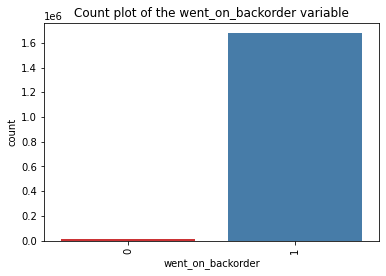

In [153]:
sns.countplot(y, palette='Set1')
plt.title("Count plot of the went_on_backorder variable")
plt.xticks(rotation = 90)
plt.show()

We can see that our dataset is imbalanced.

### **----------------------------------------Oversampling------------------------------------------------------**

In [150]:
from imblearn.over_sampling import SMOTE

In [151]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)
x_test, y_test = sm.fit_sample(x_test, y_test)

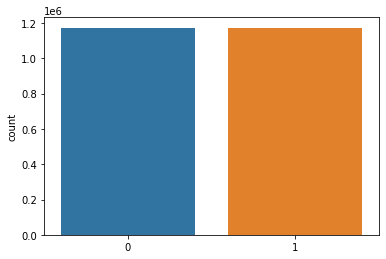

In [152]:
sns.countplot(y_train)